<a href="https://colab.research.google.com/github/routingg/open_source/blob/master/tf%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

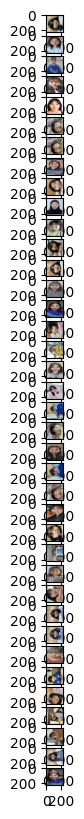

In [14]:
import tensorflow as tf
import os

def resize_images_from_folder(folder_path, target_size):
    resized_images = []

    # 폴더 내의 이미지 파일 경로들을 가져옵니다.
    image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png'))]

    for image_path in image_paths:
        # 이미지를 읽어옵니다.
        image = tf.io.read_file(image_path)

        # JPEG, PNG 등과 같은 형식에 따라 디코딩합니다.
        if image_path.endswith(".png"):
            image = tf.image.decode_png(image, channels=3)
        else:
            image = tf.image.decode_jpeg(image, channels=3)

        # 이미지 크기를 조절합니다.
        image = tf.image.resize(image, target_size)

        # 이미지를 표준화합니다.
        image = image / 255.0  # 값을 [0, 1] 범위로 조정

        # 크기 조절된 이미지를 리스트에 추가합니다.
        resized_images.append(image)

    return resized_images

# 이미지 파일들이 있는 폴더 경로를 지정합니다.
folder_path =  "/content/이미지"  # 수정해야 할 부분 (폴더 경로를 "r"로 시작하면 raw string으로 처리되어 경로 구분자를 "\\"로 사용합니다.)
target_size = (224, 224)  # 조절할 이미지 크기를 지정하세요.

# 이미지들을 크기 조절하면서 결과를 받습니다.
resized_images = resize_images_from_folder(folder_path, target_size)

# 결과 확인을 위해 이미지를 출력합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, image in enumerate(resized_images):
    plt.subplot(len(resized_images), 1, i+1)
    plt.imshow(image)
